In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif

In [74]:
# Load the teams data
teams = pd.read_csv('./cleaned_data/teams.csv')

In [75]:
# Data Preprocessing
# ------------------

# Convert 'playoff' column to binary (1 for 'Y', 0 for 'N')
teams['playoff'] = teams['playoff'].map({'Y': 1, 'N': 0})

# Sort the dataframe by team ID and year to ensure chronological order
teams = teams.sort_values(by=['tmID', 'year']).reset_index(drop=True)

# Create 'next_season_playoff' indicating playoff status in the next season
teams['next_season_playoff'] = teams.groupby('tmID')['playoff'].shift(-1)

# Drop rows where 'next_season_playoff' is NaN (last season for each team)
teams = teams.dropna(subset=['next_season_playoff'])

# Convert 'next_season_playoff' to integer type
teams['next_season_playoff'] = teams['next_season_playoff'].astype(int)

display(teams.head())

,year,tmID,rank,playoff,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,...,homeW,homeL,awayW,awayL,confW,confL,min,attend,playoff_progression_score,next_season_playoff
0,9,ATL,7,0,895,2258,542,725,202,598,...,1,16,3,14,2,18,6825,141379,0,1
2,1,CHA,8,0,812,1903,431,577,131,386,...,5,11,3,13,5,16,6475,90963,0,1
3,2,CHA,4,1,746,1780,410,528,153,428,...,11,5,7,9,15,6,6500,105525,3,1
4,3,CHA,2,1,770,1790,490,663,211,527,...,11,5,7,9,12,9,6450,106670,1,1
5,4,CHA,2,1,787,1881,456,590,187,517,...,13,4,5,12,12,12,6850,120061,1,0


In [76]:

team_stats = teams.drop(columns=['year', 'tmID', 'next_season_playoff'])
target = teams['next_season_playoff']

In [77]:
# Compute the point-biserial correlation and p-value for each feature
correlations = {}
p_values = {}

for col in team_stats.columns:
    corr_coef, p_value = pointbiserialr(team_stats[col], target)
    correlations[col] = corr_coef
    p_values[col] = p_value

# Create a DataFrame for visualization
correlation_df = pd.DataFrame({
    'Feature': correlations.keys(),
    'Correlation': correlations.values(),
    'P-value': p_values.values()
})

# Sort by absolute correlation coefficient
correlation_df['AbsCorrelation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='AbsCorrelation', ascending=False)

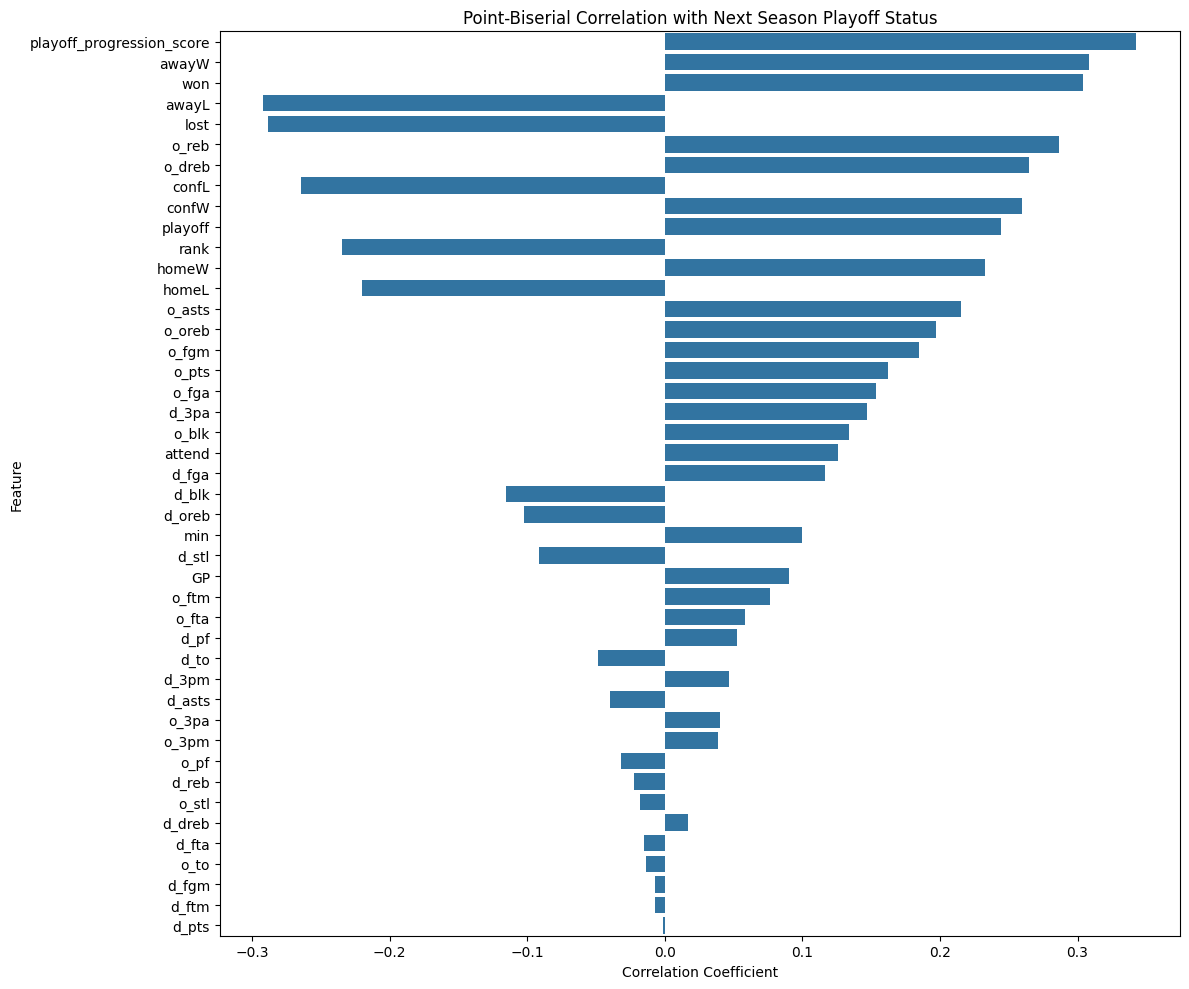

In [78]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Correlation', y='Feature', data=correlation_df)
plt.title('Point-Biserial Correlation with Next Season Playoff Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

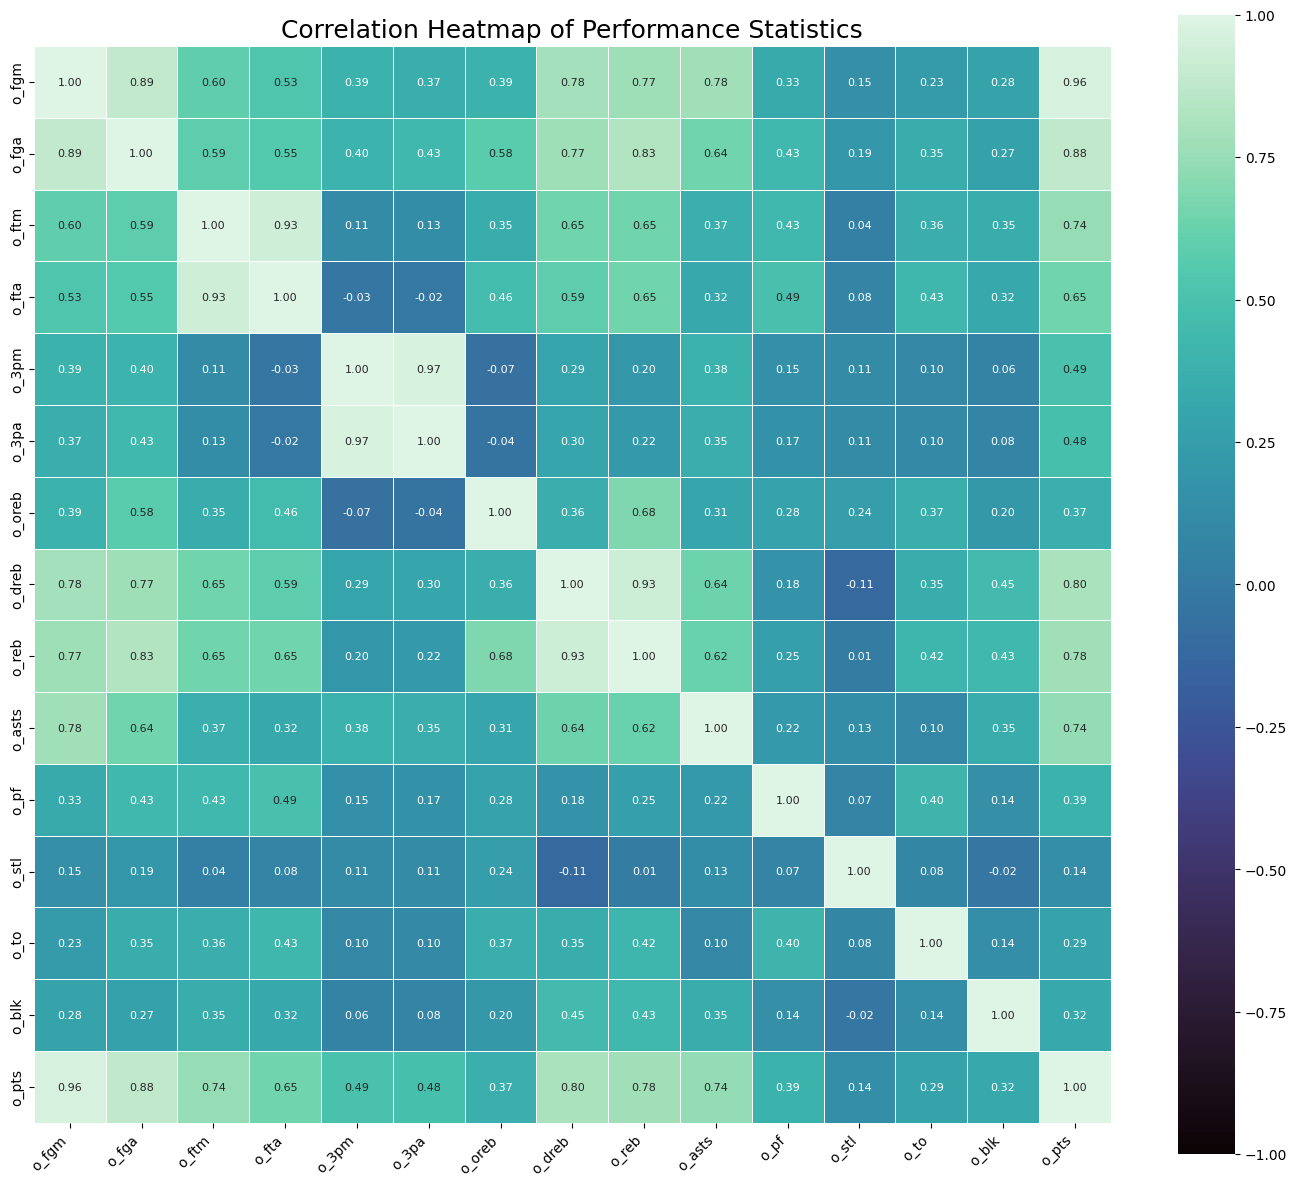

In [81]:
# Correlation between offensive statistics
# -------------------------

o_stats = teams.filter(regex='^(o_)')

corr_matrix = o_stats.corr()

plt.figure(figsize=(14, 12))

cmap = sns.color_palette("mako", as_cmap=True)

sns.heatmap(corr_matrix, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size":8})

plt.title('Correlation Heatmap of Performance Statistics', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the heatmap
plt.show()

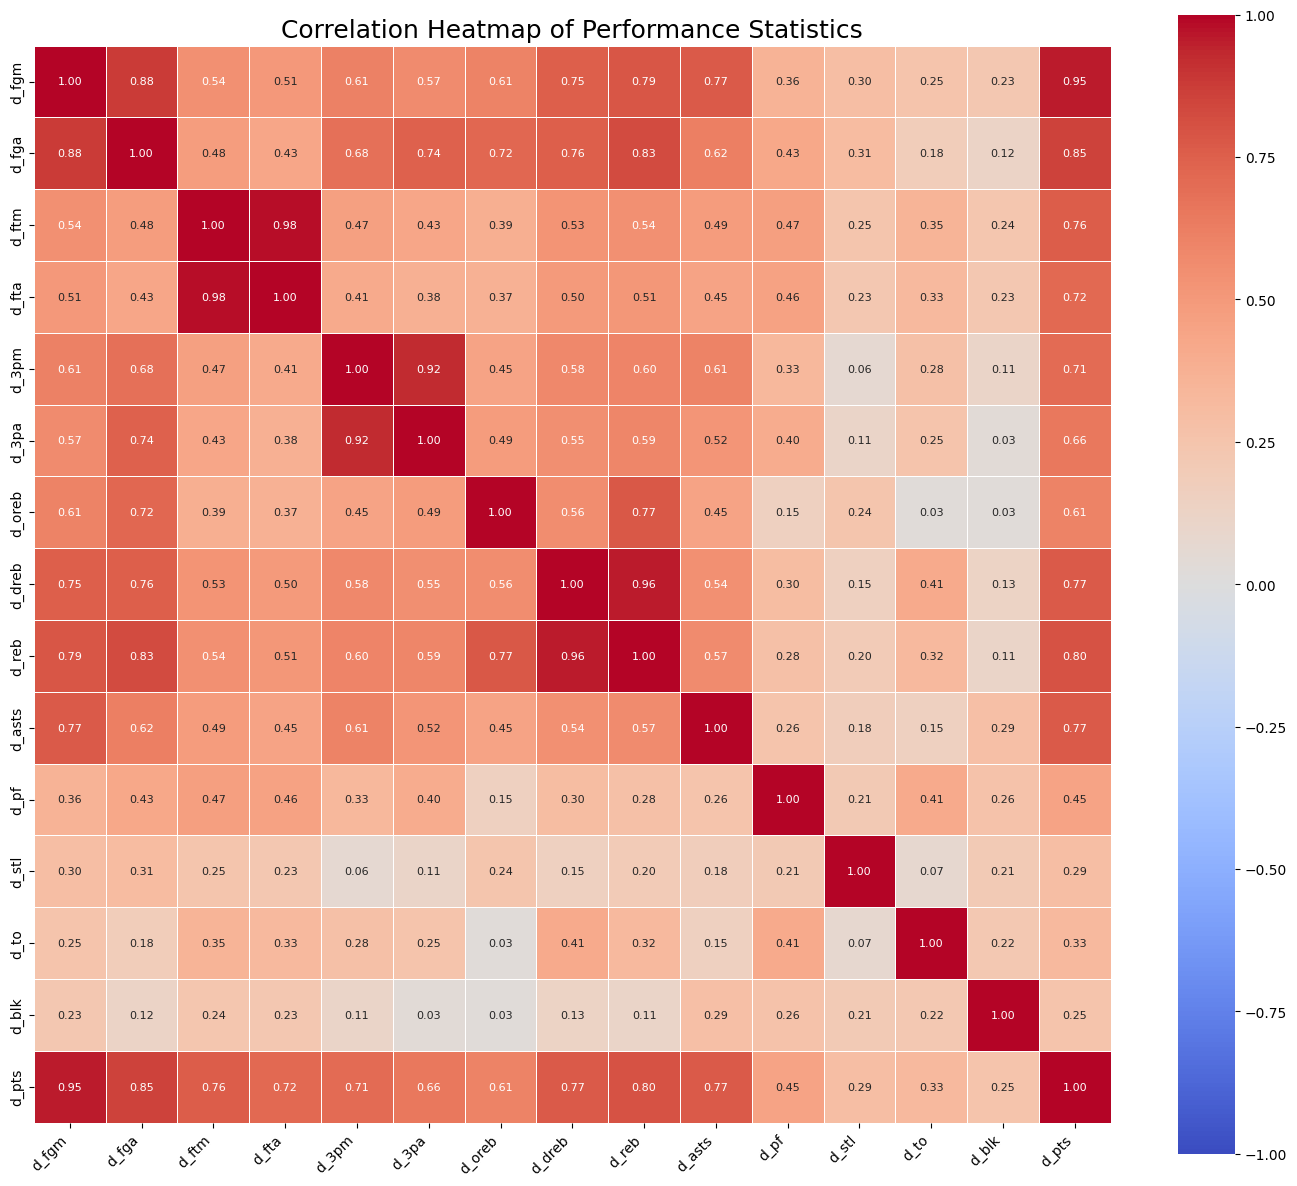

In [82]:
# Correlation between defensive statistics
# -------------------------

d_stats = teams.filter(regex='^(d_)')

corr_matrix = d_stats.corr()

plt.figure(figsize=(14, 12))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(corr_matrix, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size":8})

plt.title('Correlation Heatmap of Performance Statistics', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the heatmap
plt.show()